In [ ]:
# This reads in FITS files of unsaturated frames from the Altair Fizeau dataset and 
# makes a reference PSF

# Created 2018 Sept. 27 by E.S.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
from astropy.io import fits
from astropy.convolution import convolve, Gaussian1DKernel
import multiprocessing as mp
from multiprocessing import Process, Queue, Pool
%matplotlib inline
#%matplotlib qt

In [2]:
# stem

stem_retrieve = ('/home/../../media/unasemaje/Elements/lbti_data_reduction/180507_fizeau_altair/03_ramp_removed_pca_background_subted/')
stem = ('/home/unasemaje/Documents/git.repos/lbti_altair_fizeau/pynpoint_experimentation_altair/input_place/')

In [5]:
# initialize stuff

psf_loc = [346,804] # (y,x); PSF moves a bit, though

# frame sequence 7389-7456 and 7577-7653 are fairly good, though OPD changes a bit
goodFrameArray = np.concatenate((np.arange(7389,7456),
                                     np.arange(7577,7653)))
                                       
frame_cube = np.zeros((len(goodFrameArray),100,100), dtype=float)

In [6]:
# read in frames of unsaturated PSF

slice_num = 0
for t in range(0,len(goodFrameArray)):
    
    img_string = 'lm_180507_'+str("{:0>6d}".format(goodFrameArray[t]))+'_nPCA164.fits'
    
    # if file exists
    if os.path.isfile(stem_retrieve+img_string):
        
        # read in image
        sciImg, header = fits.getdata(stem_retrieve+img_string,0,header=True)

        # add cutout to cube
        frame_cube[slice_num,:,:] = sciImg[psf_loc[0]-50:psf_loc[0]+50,psf_loc[1]-50:psf_loc[1]+50]
        
        slice_num += 1 # advance counter
        
    else:
        
        print('File '+img_string+' not found')

In [8]:
np.min(frame_cube[0,:,:])

-258.5696891952319

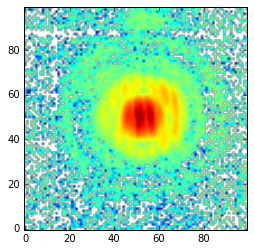

In [11]:
from matplotlib import colors

plt.imshow(median_psf, origin="lower", norm=colors.LogNorm(vmin=0.1, vmax=frame_cube.max()))
plt.show()

In [17]:
# make median

median_psf = np.median(frame_cube, axis=0)

In [18]:
# save it

header['PARANG'] = np.float(0)

hdu = fits.PrimaryHDU(median_psf, header=header)
hdul = fits.HDUList([hdu])
    
hdul.writeto(stem+'ref_psf/ref_psf.fits', overwrite=True)

In [19]:
test, header1 = fits.getdata(stem+'ref_psf/ref_psf.fits',0,header=True)

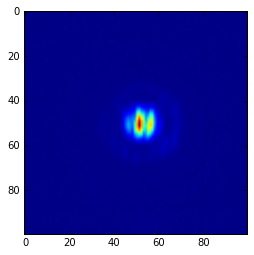

In [20]:
plt.imshow(test)
plt.show()

In [23]:
header1

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  100                                                  
NAXIS2  =                  100                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
NCOADDS =                    1 / Total number of coadds per pixel in a stack    
COMMENT --- ISDEC settings ---                                                  
USEREXP =                    0 / Requested Exposure Time, usec                  
ACTEXP  =               145976 / Actual Exposure Time, usec                     
NRESETS =                    1 / Num of Reset Frames at the beginning of Ramp   
NREADS  =                   